C:\Users\Krishnan\AppData\Local\Temp\ipykernel_19856\1504368816.py:11: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Data_Gov_Tamil_Nadu.csv', encoding='ISO-8859-1')
C:\Users\Krishnan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Krishnan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Krishnan\AppData\Local\Packages\PythonSoftwa

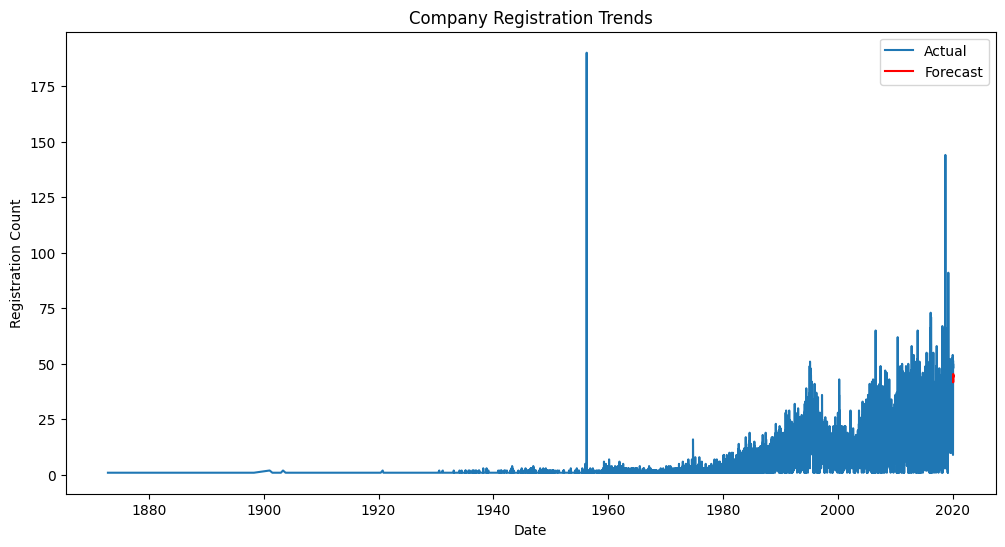

Classification Results:
Accuracy: 0.9996023198011599
                                                                                                                precision    recall  f1-score   support

Activities of private households as employers and undifferentiated production activities of private households       1.00      1.00      1.00         4
                                                                                          Agriculture & allied       1.00      1.00      1.00      1498
                                                                                                  Construction       1.00      1.00      1.00      1791
                                                                                                     Education       0.99      1.00      1.00       343
                                                                              Electricity gas and water supply       1.00      1.00      1.00       502
                                  

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load dataset
data = pd.read_csv('Data_Gov_Tamil_Nadu.csv', encoding='ISO-8859-1')

# Data preprocessing for classification
# - Handle missing values
# - Encode categorical variables
# - Feature engineering for classification (if needed)
features = ['COMPANY_CLASS', 'AUTHORIZED_CAP', 'PAIDUP_CAPITAL', 'INDUSTRIAL_CLASS']
target = 'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'

# Encode categorical features using Label Encoding
for feature in ['COMPANY_CLASS', 'INDUSTRIAL_CLASS']:
    data[feature] = data[feature].astype('category').cat.codes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Multi-Class Classification Model (Random Forest Classifier)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions for classification
y_pred = rf_classifier.predict(X_test)

# Evaluate the classification model
classification_accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

# Data preprocessing for time series forecasting
# Assuming you have a date column (DATE_OF_REGISTRATION)
data["DATE_OF_REGISTRATION"] = pd.to_datetime(data["DATE_OF_REGISTRATION"], format='%d-%m-%Y')
time_series_data = data.groupby("DATE_OF_REGISTRATION").size().reset_index(name="count")
time_series_data.set_index("DATE_OF_REGISTRATION", inplace=True)

# Fit an ARIMA model for time series forecasting
arima_model = ARIMA(time_series_data, order=(5, 1, 0))  # You can adjust the order based on your data
arima_model_fit = arima_model.fit()

# Forecast future registration trends
forecast_periods = 12  # Adjustment of the number of forecast periods
forecast = arima_model_fit.forecast(steps=forecast_periods)


# Plot the time series and forecast for time series forecasting
plt.figure(figsize=(12, 6))
plt.plot(time_series_data, label="Actual")
plt.plot(
    pd.date_range(
        start=time_series_data.index[-1], periods=forecast_periods
    ),
    forecast,
    label="Forecast",
    color="red",
)
plt.legend()
plt.xlabel("Date")
plt.ylabel("Registration Count")
plt.title("Company Registration Trends")
plt.show()

# Print classification results and forecast for time series
print("Classification Results:")
print(f"Accuracy: {classification_accuracy}")
print(classification_report)

print("\nTime Series Forecast:")
print(f"Forecasted values: {forecast}")